In [1]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sea
import string
import nltk
import re
import sys
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_wine, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from time import time
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [2]:
#Завдання 3
text_data = pandas.read_csv("/home/anatoliy/Downloads/data.csv")
text_data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [3]:
from collections import Counter
Counter( text_data['rating'])

Counter({5: 5726, 4: 2365, 1: 691, 3: 884, 2: 310})

In [4]:
# Передобробка даних
stop_words = stopwords.words('english')
filtered_text = []
for i in text_data["review"]:
    i = re.sub("\d", " ", i)
    i = re.sub('[%s]' % re.escape(string.punctuation), ' ', i)
    i = re.sub('\n', ' ', i)
    i = re.sub('\s{2,}', " ", i)
    i = re.sub("@\S+", " ", i)
    i = re.sub("https*\S+", " ", i)
    i = re.sub("#\S+", " ", i)
    i = re.sub("\d", " ", i)
    text_tokens = word_tokenize(i)
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)

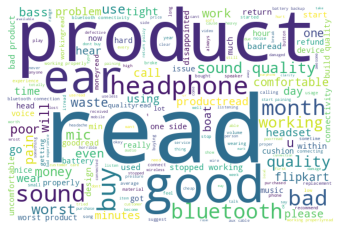

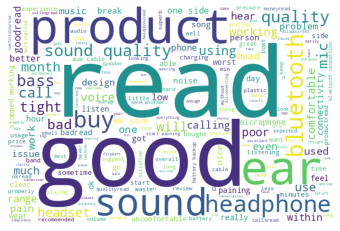

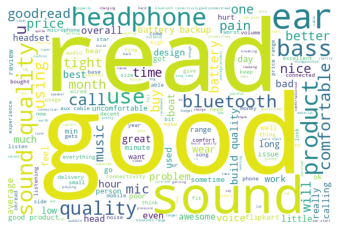

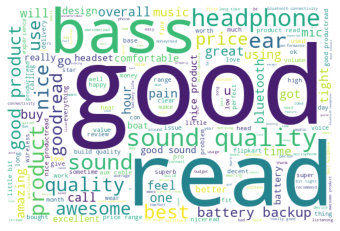

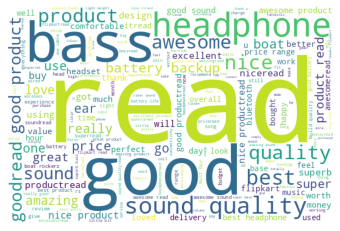

In [5]:
# Візуалізація
def visualize(label):
    text = ''
    for msg in text_data[text_data['rating'] == label]['review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plot.imshow(wordcloud)
    plot.axis('off')
    plot.show()
for i in range(1, 6):
    visualize(i)

In [6]:
# Векторизаця
X_train, X_test, Y_train, Y_test = train_test_split(text_data['review'], text_data['rating'], test_size=0.20)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

In [7]:
#класифікація з логічною регресією
classification = LogisticRegression().fit(tfidf_train, Y_train)
prediction = classification.predict(tfidf_test)
print(classification_report(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))
print("Accuracy score:", accuracy_score(Y_test,prediction))

              precision    recall  f1-score   support

           1       0.67      0.51      0.58       139
           2       0.33      0.02      0.03        64
           3       0.38      0.16      0.22       164
           4       0.39      0.20      0.26       487
           5       0.67      0.92      0.78      1142

    accuracy                           0.63      1996
   macro avg       0.49      0.36      0.38      1996
weighted avg       0.57      0.63      0.57      1996

[[  71    1    8   16   43]
 [  15    1    5   18   25]
 [  11    1   26   46   80]
 [   6    0   18   97  366]
 [   3    0   11   72 1056]]
Accuracy score: 0.6267535070140281
